In [23]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
import scipy.stats as stats
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [24]:
# from google.colab import files
# uploaded = files.upload()
train=pd.read_csv("products copy4.csv")

In [25]:
# Check Data in your file
train

,Product,Buyer1,Buyer2,Buyer3,Buyer4,Actual_Demand,Sales,Cost_Price,Normal_Price,Markdown_Price,Buy_Quantity,Underbuy_Cost,Overbuy_Cost
0,Tracks,89,86,102,102,85,85,40,60,32,NaN,NaN,NaN
1,T-Shirt,150,120,192,87,198,137,26,48,24,NaN,NaN,NaN
2,Outdoor Shoes,51,100,152,39,132,86,77,160,55,NaN,NaN,NaN
3,Terrex T-Shirt,30,91,183,76,29,29,65,110,47,NaN,NaN,NaN


Financial based on data

In [26]:
# train["Buy_Quantity"] = train[['Buyer1','Buyer2','Buyer3','Buyer4']].mean(axis=1).round()
# def new_sales(row):
#      if  row['Actual_Demand'] > row['Buy_Quantity']:
#             return row['Buy_Quantity']
#      else :
#             return row['Sales']
    
# train['Sales'] = train.apply(new_sales, axis=1)
train["Buy_Quantity"] = train[['Buyer1','Buyer2','Buyer3','Buyer4']].mean(axis=1).round()
train["Standard_Dev"] = train[['Buyer1','Buyer2','Buyer3','Buyer4']].std(ddof=0,axis=1)
train['Underbuy_Cost'] = train['Normal_Price'] - train['Cost_Price']
train['Overbuy_Cost'] = train['Cost_Price'] - train['Markdown_Price']

#Calculate Gross Sales

def gross_margin(row):
     return row['Sales'] * row['Underbuy_Cost']

#Markdown Losses

def markdown_loss(row):
     if (row['Buy_Quantity'] > row['Sales']):
         return (row['Buy_Quantity'] - row['Sales']) * row['Overbuy_Cost']
     else:
            return 0
    
#Calculate Net profit

def net_profit(row):
     return row['Gross_Margin'] - row['Markdown_Losses']
    
#Calculate Lost Sales

def lost_sales(row):
    if row['Buy_Quantity'] < row['Actual_Demand']:
         return row['Actual_Demand'] - row['Buy_Quantity']
    else:
        return 0
    
#Calculate Lost Margin

def lost_margin(row):
     return row['Lost_Sales'] * row['Underbuy_Cost']
    
    
train['Gross_Margin'] = train.apply(gross_margin, axis=1)
train['Markdown_Losses'] = train.apply(markdown_loss, axis=1)
train['Net_Profit'] = train.apply(net_profit, axis=1)
train['Lost_Sales'] = train.apply(lost_sales, axis=1)
train['Lost_Margin'] = train.apply(lost_margin, axis=1)

In [27]:
#Profit/Loss in this in the buy
buy_forecast = train.loc[:,['Product','Buy_Quantity','Actual_Demand','Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin']]
buy_forecast.loc['Total'] = pd.Series(buy_forecast[['Net_Profit','Lost_Margin']].sum(), index = ['Net_Profit','Lost_Margin'])
buy_forecast

,Product,Buy_Quantity,Actual_Demand,Sales,Gross_Margin,Markdown_Losses,Net_Profit,Lost_Sales,Lost_Margin
0,Tracks,95.0,85.0,85.0,1700.0,80.0,1620.0,0.0,0.0
1,T-Shirt,137.0,198.0,137.0,3014.0,0.0,3014.0,61.0,1342.0
2,Outdoor Shoes,86.0,132.0,86.0,7138.0,0.0,7138.0,46.0,3818.0
3,Terrex T-Shirt,95.0,29.0,29.0,1305.0,1188.0,117.0,0.0,0.0
Total,NaN,NaN,NaN,NaN,NaN,NaN,11889.0,NaN,5160.0


In [28]:
buy_forecast_10 = train

In [29]:
input_change = input()
change_to_add = 1 + (int(input_change)/100)
print(change_to_add)
buy_forecast_10['Buy_Quantity'] = round(train['Buy_Quantity'] * change_to_add)  #Adding 10 % more
# buy_forecast_10

8
1.08


In [30]:
def new_sales(row):
     if  row['Actual_Demand'] > row['Buy_Quantity']:
            return row['Buy_Quantity']
     else :
            return row['Sales']
    
buy_forecast_10['Sales'] = buy_forecast_10.apply(new_sales, axis=1)
buy_forecast_10['Underbuy_Cost'] = buy_forecast_10['Normal_Price'] - buy_forecast_10['Cost_Price']
buy_forecast_10['Overbuy_Cost'] = buy_forecast_10['Cost_Price'] - buy_forecast_10['Markdown_Price']


#Calculate Gross Sales

def gross_margin(row):
     return row['Sales'] * row['Underbuy_Cost']

#Markdown Losses

def markdown_loss(row):
     if (row['Buy_Quantity'] > row['Sales']):
         return (row['Buy_Quantity'] - row['Sales']) * row['Overbuy_Cost']
     else:
            return 0
    
#Calculate Net profit

def net_profit(row):
     return row['Gross_Margin'] - row['Markdown_Losses']
    
#Calculate Lost Sales

def lost_sales(row):
    if row['Buy_Quantity'] < row['Actual_Demand']:
         return row['Actual_Demand'] - row['Buy_Quantity']
    else:
        return 0
    
#Calculate Lost Margin

def lost_margin(row):
     return row['Lost_Sales'] * row['Underbuy_Cost']
    
    
buy_forecast_10['Gross_Margin'] = buy_forecast_10.apply(gross_margin, axis=1)
buy_forecast_10['Markdown_Losses'] = buy_forecast_10.apply(markdown_loss, axis=1)
buy_forecast_10['Net_Profit'] = buy_forecast_10.apply(net_profit, axis=1)
buy_forecast_10['Lost_Sales'] = buy_forecast_10.apply(lost_sales, axis=1)
buy_forecast_10['Lost_Margin'] = buy_forecast_10.apply(lost_margin, axis=1)

In [31]:
buy_forecast_10 = buy_forecast_10.loc[:,['Product','Buy_Quantity','Actual_Demand','Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin']]
buy_forecast_10.loc['Total'] = pd.Series(buy_forecast_10[['Net_Profit','Lost_Margin']].sum(), index = ['Net_Profit','Lost_Margin'])
buy_forecast_10

,Product,Buy_Quantity,Actual_Demand,Sales,Gross_Margin,Markdown_Losses,Net_Profit,Lost_Sales,Lost_Margin
0,Tracks,103.0,85.0,85.0,1700.0,144.0,1556.0,0.0,0.0
1,T-Shirt,148.0,198.0,148.0,3256.0,0.0,3256.0,50.0,1100.0
2,Outdoor Shoes,93.0,132.0,93.0,7719.0,0.0,7719.0,39.0,3237.0
3,Terrex T-Shirt,103.0,29.0,29.0,1305.0,1332.0,-27.0,0.0,0.0
Total,NaN,NaN,NaN,NaN,NaN,NaN,12504.0,NaN,4337.0


In [32]:
# Risk Adjusted Model based on input demand

risk_adjusted_layer = train

risk_adjusted_layer["Buy_Quantity"] = risk_adjusted_layer[['Buyer1','Buyer2','Buyer3','Buyer4']].mean(axis=1).round()
risk_adjusted_layer["Standard_Dev"] = risk_adjusted_layer[['Buyer1','Buyer2','Buyer3','Buyer4']].std(ddof=0,axis=1)
risk_adjusted_layer['Underbuy_Cost'] = risk_adjusted_layer['Normal_Price'] - train['Cost_Price']
risk_adjusted_layer['Overbuy_Cost'] = risk_adjusted_layer['Cost_Price'] - train['Markdown_Price']

demand1 = 86
demand2 = 89
demand3 = 102 
demand_arr = [demand1,demand2,demand3]     #Put it in a loop within function for dynamic generation

def expected_cost(row):
    demand_range_min = round(row['Actual_Demand'] * 0.6)    #Setting lower limits
    demand_range_max = round(row['Actual_Demand'] * 1.4)    #Setting higher limits
    demand_range_arr = list(range(demand_range_min,demand_range_max))
    costing_range = []
    for ii in range(len(demand_range_arr)):
        cost = []
        for i in range(len(demand_arr)):
            if (demand_range_arr[ii] < demand_arr[i]): 
                 cost.append(row['Underbuy_Cost'] * (demand_arr[i]-demand_range_arr[ii]))
            else:
                 cost.append(row['Overbuy_Cost'] * (demand_range_arr[ii]- demand_arr[i]))
                    
        best_cost = cost[0]*0.25 + cost[1]*0.25 +cost[2]*0.5
        
        costing_range.append(best_cost)
        
    min_qty_index = np.argmin(costing_range)
    
    return demand_range_arr[min_qty_index]

risk_adjusted_layer['Optimal_Qty_Risk'] = risk_adjusted_layer.apply(expected_cost,axis=1)

In [33]:
def new_sales(row):
     if  row['Actual_Demand'] > row['Optimal_Qty_Risk']:
            return row['Optimal_Qty_Risk']
     else :
            return row['Sales']
    
risk_adjusted_layer['Sales'] = risk_adjusted_layer.apply(new_sales, axis=1)
risk_adjusted_layer["Standard_Dev"] = risk_adjusted_layer[['Buyer1','Buyer2','Buyer3','Buyer4']].std(ddof=0,axis=1)
risk_adjusted_layer['Underbuy_Cost'] = risk_adjusted_layer['Normal_Price'] - risk_adjusted_layer['Cost_Price']
risk_adjusted_layer['Overbuy_Cost'] = risk_adjusted_layer['Cost_Price'] - risk_adjusted_layer['Markdown_Price']

#Calculate Gross Sales

def gross_margin(row):
     return row['Sales'] * row['Underbuy_Cost']

#Markdown Losses

def markdown_loss(row):
     if (row['Optimal_Qty_Risk'] > row['Sales']):
         return (row['Optimal_Qty_Risk'] - row['Sales']) * row['Overbuy_Cost']
     else:
            return 0
    
#Calculate Net profit

def net_profit(row):
     return row['Gross_Margin'] - row['Markdown_Losses']
    
#Calculate Lost Sales

def lost_sales(row):
    if row['Optimal_Qty_Risk'] < row['Actual_Demand']:
         return row['Actual_Demand'] - row['Optimal_Qty_Risk']
    else:
        return 0
    
#Calculate Lost Margin

def lost_margin(row):
     return row['Lost_Sales'] * row['Underbuy_Cost']   
    
risk_adjusted_layer['Gross_Margin'] = risk_adjusted_layer.apply(gross_margin, axis=1)
risk_adjusted_layer['Markdown_Losses'] = risk_adjusted_layer.apply(markdown_loss, axis=1)
risk_adjusted_layer['Net_Profit'] = risk_adjusted_layer.apply(net_profit, axis=1)
risk_adjusted_layer['Lost_Sales'] = risk_adjusted_layer.apply(lost_sales, axis=1)
risk_adjusted_layer['Lost_Margin'] = risk_adjusted_layer.apply(lost_margin, axis=1)


In [34]:
risk_adjusted_layer = risk_adjusted_layer.loc[:,['Product','Buy_Quantity','Optimal_Qty_Risk','Actual_Demand','Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin']]
risk_adjusted_layer.loc['Total'] = pd.Series(risk_adjusted_layer[['Net_Profit','Lost_Margin']].sum(), index = ['Net_Profit','Lost_Margin'])
# risk_adjusted_layer

In [35]:
# Risk Adjusted Continous Gamma Model

risk_adjusted_gamma_layer = train
risk_adjusted_gamma_layer["Buy_Quantity"] = risk_adjusted_gamma_layer[['Buyer1','Buyer2','Buyer3','Buyer4']].mean(axis=1).round()
risk_adjusted_gamma_layer["Mean"] = risk_adjusted_gamma_layer[['Buyer1','Buyer2','Buyer3','Buyer4']].mean(axis=1)
risk_adjusted_gamma_layer["Standard_Dev"] = risk_adjusted_gamma_layer[['Buyer1','Buyer2','Buyer3','Buyer4']].std(ddof=0,axis=1)
risk_adjusted_gamma_layer['Underbuy_Cost'] = risk_adjusted_gamma_layer['Normal_Price'] - train['Cost_Price']
risk_adjusted_gamma_layer['Overbuy_Cost'] = risk_adjusted_gamma_layer['Cost_Price'] - train['Markdown_Price']

def expected_cost_gamma(row):
    prb = []
#     calculate alpha and beta
    alpha = (row['Mean'] / row['Standard_Dev'])**2
    beta = ((row['Standard_Dev'])**2)/(row['Mean'])  
    demand_g_range_min = round(row['Actual_Demand'] * 0.70)    #Setting lower limits
    demand_g_range_max = round(row['Actual_Demand'] * 1.30)    #Setting higher limits
    demand_g_range_arr = list(range(demand_g_range_min,demand_g_range_max))
#     print(demand_g_range_arr)
    costing_g_range = []
    cost_g = 0
#     for kg in range(len(demand_g_range_arr)):
    cal_cost_g = 0
    gamma_cal_val = 0
    for ik in range(len(demand_g_range_arr)):
        gamma_cal_val = 0
        for ig in range(len(demand_g_range_arr)):
                prob = stats.gamma.pdf(demand_g_range_arr[ig], a=alpha, scale=beta)
                if (demand_g_range_arr[ik] < demand_g_range_arr[ig]): 
                    cost_g = row['Overbuy_Cost'] * (demand_g_range_arr[ig] - demand_g_range_arr[ik])
                else:                
                    cost_g = (demand_g_range_arr[ik] - demand_g_range_arr[ig]) * row['Underbuy_Cost']
                cal_cost_g = (prob * cost_g)
                gamma_cal_val = cal_cost_g + gamma_cal_val
        costing_g_range.append(gamma_cal_val)
    min_qty_g_index = np.argmin(costing_g_range)
    print ("Optimal Buy for",row['Product'],"-",demand_g_range_arr[min_qty_g_index])
    return demand_g_range_arr[min_qty_g_index]

risk_adjusted_gamma_layer['Optimal_Qty_Risk'] = risk_adjusted_gamma_layer.apply(expected_cost_gamma,axis=1)

Optimal Buy for Tracks - 90
Optimal Buy for T-Shirt - 142
Optimal Buy for Outdoor Shoes - 101
Optimal Buy for Terrex T-Shirt - 26


In [36]:
# risk_adjusted_gamma_layer

In [37]:
risk_adjusted_gamma_layer_fore = risk_adjusted_gamma_layer

In [38]:
def new_sales(row):
     if  row['Actual_Demand'] > row['Optimal_Qty_Risk']:
            return row['Optimal_Qty_Risk']
     else :
            return row['Sales']
    
risk_adjusted_gamma_layer_fore['Sales'] = risk_adjusted_gamma_layer_fore.apply(new_sales, axis=1)  
risk_adjusted_gamma_layer_fore['Underbuy_Cost'] = risk_adjusted_gamma_layer_fore['Normal_Price'] - risk_adjusted_gamma_layer_fore['Cost_Price']
risk_adjusted_gamma_layer_fore['Overbuy_Cost'] = risk_adjusted_gamma_layer_fore['Cost_Price'] - risk_adjusted_gamma_layer_fore['Markdown_Price']

#Calculate Gross Sales

def gross_margin(row):
     return row['Sales'] * row['Underbuy_Cost']

#Markdown Losses

def markdown_loss(row):
     if (row['Optimal_Qty_Risk'] > row['Sales']):
         return (row['Optimal_Qty_Risk'] - row['Sales']) * row['Overbuy_Cost']
     else:
            return 0
    
#Calculate Net profit

def net_profit(row):
     return row['Gross_Margin'] - row['Markdown_Losses']
    
#Calculate Lost Sales

def lost_sales(row):
    if row['Optimal_Qty_Risk'] < row['Actual_Demand']:
         return row['Actual_Demand'] - row['Optimal_Qty_Risk']
    else:
        return 0
    
#Calculate Lost Margin

def lost_margin(row):
     return row['Lost_Sales'] * row['Underbuy_Cost']
    
    
risk_adjusted_gamma_layer_fore['Gross_Margin'] = risk_adjusted_gamma_layer_fore.apply(gross_margin, axis=1)
risk_adjusted_gamma_layer_fore['Markdown_Losses'] = risk_adjusted_gamma_layer_fore.apply(markdown_loss, axis=1)
risk_adjusted_gamma_layer_fore['Net_Profit'] = risk_adjusted_gamma_layer_fore.apply(net_profit, axis=1)
risk_adjusted_gamma_layer_fore['Lost_Sales'] = risk_adjusted_gamma_layer_fore.apply(lost_sales, axis=1)
risk_adjusted_gamma_layer_fore['Lost_Margin'] = risk_adjusted_gamma_layer_fore.apply(lost_margin, axis=1)

In [39]:
risk_adjusted_gamma_layer = risk_adjusted_gamma_layer.loc[:,['Product','Buy_Quantity','Optimal_Qty_Risk','Actual_Demand','Sales','Gross_Margin','Markdown_Losses','Net_Profit','Lost_Sales','Lost_Margin']]
risk_adjusted_gamma_layer.loc['Total'] = pd.Series(risk_adjusted_gamma_layer[['Net_Profit','Lost_Margin']].sum(), index = ['Net_Profit','Lost_Margin'])
risk_adjusted_gamma_layer

,Product,Buy_Quantity,Optimal_Qty_Risk,Actual_Demand,Sales,Gross_Margin,Markdown_Losses,Net_Profit,Lost_Sales,Lost_Margin
0,Tracks,95.0,90.0,85.0,85.0,1700.0,40.0,1660.0,0.0,0.0
1,T-Shirt,137.0,142.0,198.0,142.0,3124.0,0.0,3124.0,56.0,1232.0
2,Outdoor Shoes,86.0,101.0,132.0,101.0,8383.0,0.0,8383.0,31.0,2573.0
3,Terrex T-Shirt,95.0,26.0,29.0,26.0,1170.0,0.0,1170.0,3.0,135.0
Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14337.0,NaN,3940.0


In [40]:
# Markdown Model - Estimate best markdowns

risk_adjusted_gamma_layer = train

risk_adjusted_gamma_layer["Buy_Quantity"] = risk_adjusted_gamma_layer[['Buyer1','Buyer2','Buyer3','Buyer4']].mean(axis=1).round()
risk_adjusted_gamma_layer["Mean"] = risk_adjusted_gamma_layer[['Buyer1','Buyer2','Buyer3','Buyer4']].mean(axis=1)
risk_adjusted_gamma_layer["Standard_Dev"] = risk_adjusted_gamma_layer[['Buyer1','Buyer2','Buyer3','Buyer4']].std(ddof=0,axis=1)
risk_adjusted_gamma_layer['Underbuy_Cost'] = risk_adjusted_gamma_layer['Normal_Price'] - train['Cost_Price']
risk_adjusted_gamma_layer['Overbuy_Cost'] = risk_adjusted_gamma_layer['Cost_Price'] - train['Markdown_Price']


def expected_cost_gamma(row):
    # Get p value
    p_val = (row['Cost_Price']-row['Markdown_Price'])/(row['Normal_Price'] - row['Markdown_Price'])
    print(p_val)
    prb = []
#     calculate alpha and beta
    alpha = (row['Mean'] / row['Standard_Dev'])**2
    beta = ((row['Standard_Dev'])**2)/(row['Mean'])
#     alpha = (risk_adjusted_gamma_layer["Mean"] / risk_adjusted_gamma_layer["Standard_Dev"])**2
#     beta = ((risk_adjusted_gamma_layer["Standard_Dev"])**2)/(risk_adjusted_gamma_layer["Mean"])
    print ('A-',alpha,'B-',beta)
#     prob = stats.gamma.pdf(row['Buy_Quantity'], a=alpha, scale=beta)                                                      
#     prb.append(prob)                                                
    demand_g_range_min = round(row['Buy_Quantity'] * 0.70)    #Setting lower limits
    demand_g_range_max = round(row['Buy_Quantity'] * 1.30)    #Setting higher limits
    demand_g_range_arr = list(range(demand_g_range_min,demand_g_range_max))
#     print(demand_g_range_arr)
    costing_g_range = []
    cost_g = 0
#     for kg in range(len(demand_g_range_arr)):
    cal_cost_g = 0
    gamma_cal_val = 0
    for ig in range(len(demand_g_range_arr)):
#                 print ("Reading Row",demand_g_range_arr[ik])
                prob = stats.gamma.pdf(demand_g_range_arr[ig], a=alpha, scale=beta)                                                      
#                 print(prob)
#                 if (demand_g_range_arr[ik] < demand_g_range_arr[ig]): 
#                     cost_g = row['Overbuy_Cost'] * (demand_g_range_arr[ig] - demand_g_range_arr[ik])
# #                     print ("Prb-",prob,cost_g,"-",demand_g_range_arr[ig],",",(demand_g_range_arr[ig] - demand_g_range_arr[ik]))
#                 else:                
#                     cost_g = (demand_g_range_arr[ik] - demand_g_range_arr[ig]) * row['Underbuy_Cost']
# #                     print (cost_g,"-",demand_g_range_arr[ig],"-",(demand_g_range_arr[ik] - demand_g_range_arr[ig]))
# #                     print(prob[0])
#                 cal_cost_g = (prob * cost_g)
#                 gamma_cal_val = cal_cost_g + gamma_cal_val
    #             print(cal_cost_g)
    costing_g_range.append(gamma_cal_val)
    

    min_qty_g_index = np.argmin(costing_g_range)
    print ("Optimal Buy","-",demand_g_range_arr[min_qty_g_index])
#     return demand_g_range_arr[min_qty_g_index]

# risk_adjusted_gamma_layer['Optimal_Qty_Risk'] = risk_adjusted_gamma_layer.apply(expected_cost_gamma,axis=1)

# min_qty_index = np.argmin(costing_range)
# print (demand_range_arr[min_qty_index])
# return demand_range_arr[min_qty_index]

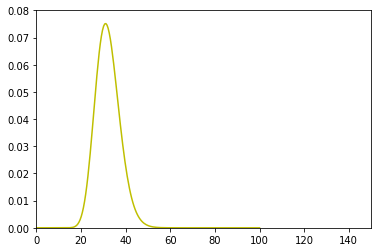

In [41]:

x = np.linspace (0, 100, 200) 
y1 = stats.gamma.pdf(x, a=29, loc=3) #a is alpha, loc is beta???
plt.plot(x, y1, "y-", label=(r'$\alpha=29, \beta=3$')) 


plt.ylim([0,0.08])
plt.xlim([0,150])
plt.show()